<a href="https://colab.research.google.com/github/MunazaAshraf/Deep-Learning-BWF/blob/main/Task24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vectorization**

In [1]:
# With Python Lists
a=list(range(1000000)) #10^6 numbers generated
%timeit [val + 5 for val in a] #Computing Element Wise Operation

121 ms ± 25.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [2]:
# With Numpy Arrays
import numpy as np
a=np.array(a) #Converting into numpy array type
%timeit a+5

692 µs ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
n=10000
# Generate n random numbers between 0 - 1
theta = np.random.rand(n)
#Generate n random integers between 0 - 100 
x = np.random.randint(0, 100, n)

In [9]:
# Unvectorized
def unvectorized(n, theta, x):
    
    prediction= 0.0
    
    for j in range(n):
        prediction= prediction + theta[j]*x[j]
    
    return prediction

In [10]:
# Vectorized
def vectorized(theta, x):
    
    prediction= 0.0
    
    prediction = np.dot(theta.transpose() , x)
   
    return prediction

In [11]:
#Comparing Performance
%timeit unvectorized(n, theta, x)
%timeit vectorized(theta, x)

3.7 ms ± 75.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
22 µs ± 469 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# **VALUE NORMALIZATION**

**Take small values** — Typically, most values should be in the 0–1 range. 

**Be homogenous** — That is, all features should take values in roughly the same
range.

In [13]:
from sklearn import preprocessing
import numpy as np

In [14]:
a = np.random.random((1, 4))
a = a*20
print("Data = ", a)

Data =  [[14.4343056  10.39569463  5.10924474 17.50341087]]


In [15]:
# normalize the data attributes
normalized = preprocessing.normalize(a)
print("Normalized Data = ", normalized)

Normalized Data =  [[0.56664259 0.40810022 0.20057187 0.6871254 ]]


In [16]:
arr = np.random.randint(100,size=(15))
print('Original Array = ', arr)

Original Array =  [88 28 51  1 22 43  0 86 96 55 94 92 35 94 28]


In [17]:
arr_norm = preprocessing.normalize([arr])
print('Normalized Array = ', arr_norm )

Normalized Array =  [[0.35558821 0.1131417  0.20607953 0.00404078 0.08889705 0.17375333
  0.         0.34750666 0.38791441 0.22224263 0.37983286 0.37175131
  0.14142713 0.37983286 0.1131417 ]]


# **Handling Null Values**

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('/content/Bengaluru_House_Data.csv')

In [20]:
df.shape

(13320, 9)

In [21]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [22]:
df.isnull() # it returns boolean values
# so where where ever the data is null it returns true

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().sum() # returns sum of null values per label

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [24]:
df.isnull().sum().sum() # returns total sum of null values in whole datset

6201

***Filling Null Values***

In [25]:
df2 = df.fillna(0) # for every null value present in datset replace it with 0
df2

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,0,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,0,3600,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [26]:
# checking for null values
df2.isnull()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,False,False,False,False,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


In [27]:
df2.isnull().sum().sum()

0

In [28]:
# lets fill it with empty string
df3 = df.fillna("")
df3

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,,3600,5.0,,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [29]:
df3.isnull().sum().sum()

0

In [30]:
# Filling null values with previous values row-wise
df4 = df.fillna(method='pad')  # method = 'pad' is used for this purpose
df4

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Theanmp,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Soiewre,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,ArsiaEx,3600,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [31]:
df4.isnull().sum().sum()

0

In [32]:
# Filling null values with coming/next values row-wise (value after null value)
df5 = df.fillna(method='bfill')  # method = 'bfill' is used for this purpose i.e; backward fill
df5

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Soiewre,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,DuenaTa,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Mahla T,3600,5.0,1.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [33]:
df5.isnull().sum().sum() # as you can see the last row has no values after it so its empty

1

In [34]:
# Filling null values with previous values column-wise (value before null value)
df6 = df.fillna(method='pad',axis=1)  # method = 'pad' is used for this purpose
# axis =1 is for vertical situations
df6

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,3 BHK,1440,2.0,3.0,62.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,2 BHK,1200,2.0,1.0,51.0
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,4 BHK,3600,5.0,5.0,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0


In [35]:
df6.isnull().sum().sum()

0

In [36]:
# Filling null values with coming/next values column-wise (value after null value)
df7 = df.fillna(method='bfill',axis=1)  # method = 'bfill' is used for this purpose i.e; backward fill
df7

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,1440,2.0,3.0,62.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,1200,2.0,1.0,51.0
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,3600,5.0,400.0,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0


In [37]:
df7.isnull().sum().sum()

0

In [38]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [39]:
# Filling different null values in different columns
df8 = df.fillna({'society': 'abcd',
                 'balcony': 'defg'})
df8

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,abcd,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,abcd,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,abcd,3600,5.0,defg,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [40]:
# filling null values with the mean of complete column
df9 = df.fillna(df['balcony'].mean())
df9

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1.584376,1440,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1.584376,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.000000,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,1.584376,3600,5.0,1.584376,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.000000,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.000000,488.00


In [41]:
# filling null values with the max of complete column
df10 = df.fillna(df['balcony'].max())
df10

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,3.0,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3.0,3600,5.0,3.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [42]:
# filling null values with the min of complete column
df11 = df.fillna(df['balcony'].min())
df11

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,0.0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,0.0,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,0.0,3600,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


***Dropping Null Values***

In [43]:
df11 =  df.dropna()
df11

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [44]:
df12 = df.dropna(how='all') # will delete only those rows that has all values null
df12

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [45]:
df13 = df.dropna(how='any') # will delete any row that has even one nulll value
df13

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


***Replacing Null Values***

In [46]:
df14 = df.replace(to_replace=np.nan, value= 'BWF') # np.nan means all the null values in df dataset
# to_replace contains the element we want to replace and value contains the value with which we want to replace the element
df14

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,BWF,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,BWF,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,BWF,3600,5.0,BWF,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [47]:
# with replace() you cannot only replace null values about any other value you wish to change
df15 = df.replace(to_replace=3.0, value= 5.56) 
df15

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.00,1.00,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.00,5.56,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.00,5.56,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,5.56,1.00,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.00,1.00,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.00,0.00,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.00,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.00,1.00,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.00,1.00,488.00


# **Feature Engineering**

In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_palette(sns.color_palette(['#851836', '#edbd17']))
sns.set_style("darkgrid")

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [51]:
df = pd.read_csv('/content/train.csv')
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


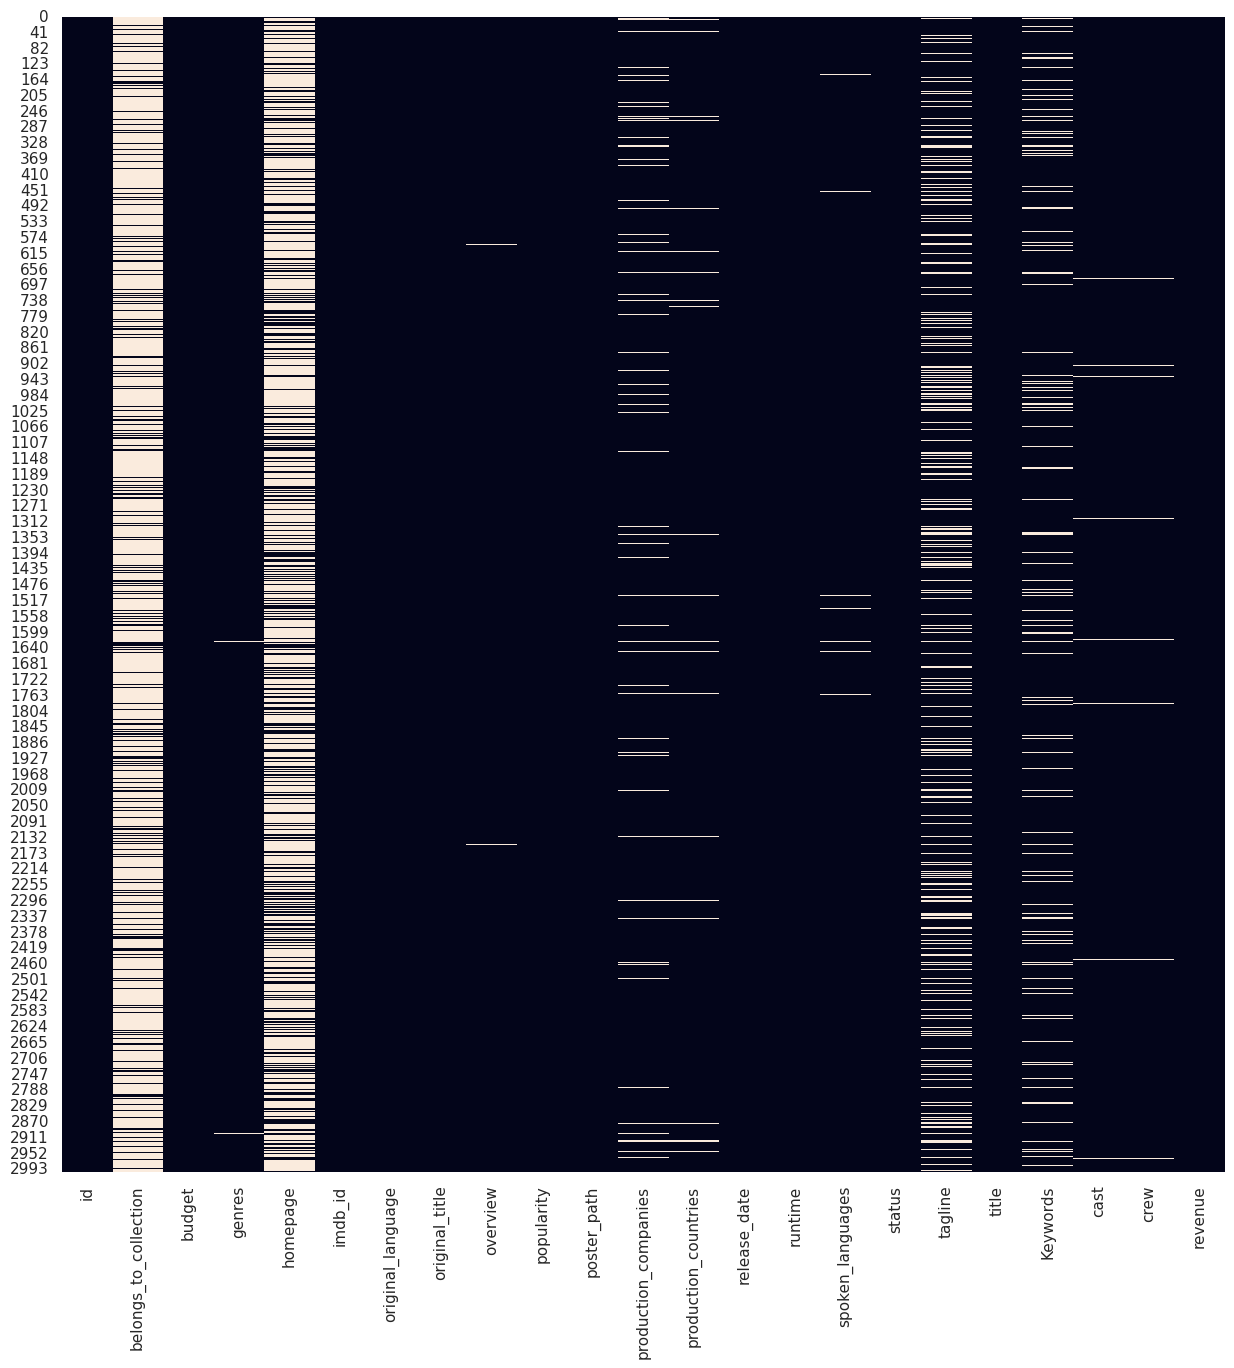

In [52]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.isnull(), cbar=False);

In [53]:
df['release_date'] = pd.to_datetime(df['release_date'])

# decomposition
df['Year'] = df['release_date'].dt.year
df['Month'] = df['release_date'].dt.month.astype(str)
df['Day'] = df['release_date'].dt.day.astype(str)

df[['Year','Month','Day']].head()

,Year,Month,Day
0,2015,2,20
1,2004,8,6
2,2014,10,10
3,2012,3,9
4,2009,2,5


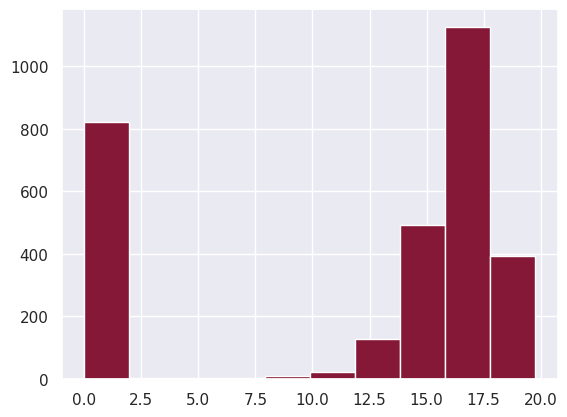

In [56]:
df['log_budget'] = np.log(df['budget'] + 1)
plt.hist(df['log_budget'], bins=10)  # Adjust the number of bins as needed
plt.show()

(array([2.371e+03, 3.500e+02, 1.660e+02, 5.600e+01, 3.000e+01, 1.500e+01,
        9.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([0.00000e+00, 4.27880e+07, 8.55760e+07, 1.28364e+08, 1.71152e+08,
        2.13940e+08, 2.56728e+08, 2.99516e+08, 3.42304e+08, 3.85092e+08,
        4.27880e+08]),
 <BarContainer object of 10 artists>)

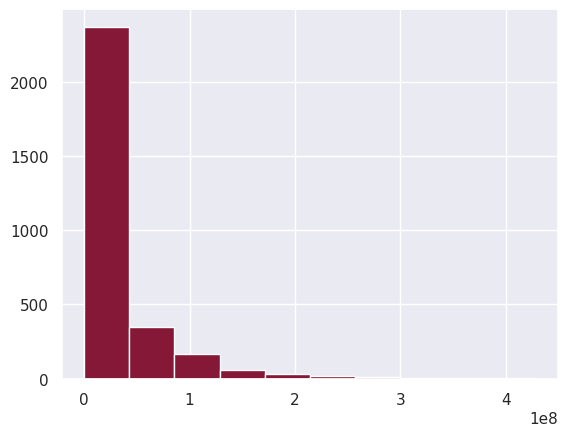

In [60]:
df['inflation_budget'] = df['budget'] * (1 + (1.8 / 100) * (2018 - df['Year']))

plt.hist(df['inflation_budget'],bins=10)

In [61]:
df['budget_runtime_ratio'] = df['budget'] / df['runtime'] 

df['budget_popularity_ratio'] = df['budget'] / df['popularity']

df['budget_year_ratio'] = df['budget'] / (df['Year'] * df['Year'])

df['releaseYear_popularity_ratio'] = df['Year'] / df['popularity']

In [62]:
# Has a homepage
df['has_homepage'] = 1
df.loc[pd.isnull(df['homepage']), "has_homepage"] = 0 

# Was in English
df['is_english'] = np.where(df['original_language']=='en', 1, 0)

In [63]:
# Fill remaining columns - categorical columns - with mode
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [65]:
engineered_df = df[['budget_runtime_ratio',
                    'budget_popularity_ratio',
                    'budget_year_ratio',
                    'releaseYear_popularity_ratio',
                    'inflation_budget',
                    'Year',
                    'Month',
                    'is_english',
                    'has_homepage',
                    'budget',
                    'popularity',
                    'runtime',
                    'revenue']]

In [66]:
engineered_df = engineered_df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
engineered_df = pd.get_dummies(engineered_df)

In [67]:
engineered_df.head()

,budget_popularity_ratio,budget_year_ratio,releaseYear_popularity_ratio,inflation_budget,Year,is_english,has_homepage,budget,popularity,runtime,...,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9
0,2.129150e+06,3.448085,306.445562,14756000.0,2015,1,0,14000000,6.575393,93.0,...,0,0,1,0,0,0,0,0,0,0
1,4.849134e+06,9.960120,242.941630,50080000.0,2004,1,0,40000000,8.248895,113.0,...,0,0,0,0,0,0,0,0,1,0
2,5.132194e+04,0.813570,31.321933,3537600.0,2014,1,1,3300000,64.299990,105.0,...,0,0,0,0,0,0,0,0,0,0
3,3.779604e+05,0.296432,633.713561,1329600.0,2012,0,1,1200000,3.174936,122.0,...,0,0,0,1,0,0,0,0,0,0
4,0.000000e+00,0.000000,1749.893299,0.0,2009,0,0,0,1.148070,118.0,...,0,0,1,0,0,0,0,0,0,0


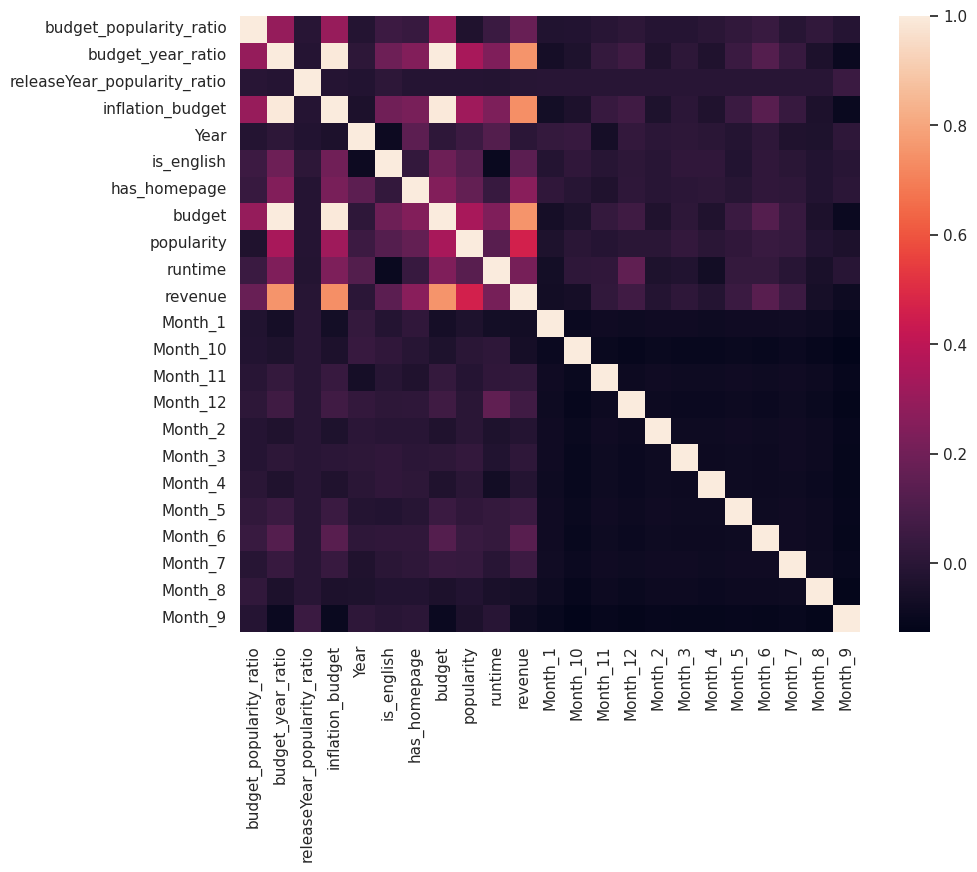

In [68]:
plt.figure(figsize=(10, 8))
sns.heatmap(engineered_df.corr());

In [69]:
train_engineered = engineered_df[['budget','runtime','popularity',
                                'has_homepage','budget_year_ratio','is_english']].iloc[:2500]
              
train_baseline = engineered_df[['budget','runtime','popularity']].iloc[:2500]

test_engineered = engineered_df[['budget','runtime','popularity',
                                'has_homepage','budget_year_ratio','is_english']].iloc[2500:]
              
test_baseline = engineered_df[['budget','runtime','popularity']].iloc[2500:]

target_train = engineered_df['revenue'].iloc[:2500]
target_test = engineered_df['revenue'].iloc[2500:]

In [70]:
reg_baseline = LinearRegression().fit(train_baseline, target_train)
reg_predict_baseline = reg_baseline.predict(test_baseline)

reg_engineered = LinearRegression().fit(train_engineered, target_train)
reg_predict_engineered = reg_engineered.predict(test_engineered)

rmse_baseline = np.sqrt(mean_squared_error(target_test, reg_predict_baseline))
rmse_engineered = np.sqrt(mean_squared_error(target_test, reg_predict_engineered))

rmse_difference = rmse_baseline - rmse_engineered

print ("The difference in RMSE is", round(rmse_difference, 2), "dollars")

The difference in RMSE is 915975.1 dollars
